In [1]:
from keras.datasets import reuters
import numpy as np
from IPython.core.interactiveshell import InteractiveShell

# Watch out with printing now!
np.set_printoptions(threshold=np.inf)
#InteractiveShell.ast_node_interactivity = "all"

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
print(len(test_data))

8982
2246


In [3]:
reverse_word_index = dict([(value, key) for (key, value) in reuters.get_word_index().items()])
decoded_text_0 = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_text_0

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
# encode the train data into tensors using Hot-One encoding
def vectorize_data(data, dimensions=10000):
    results = np.zeros((len(data), dimensions))
    for i, sequence in enumerate(data):
        results[i,sequence] = 1.
    return results

x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

In [5]:
# encode labels using Hot-One encoding
from keras.utils.np_utils import to_categorical

encoded_labels_train = to_categorical(train_labels)
encoded_labels_test = to_categorical(test_labels)

In [6]:
# Model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compile
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
# For validation purposes
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = encoded_labels_train[:1000]
partial_y_train = encoded_labels_train[1000:]

In [8]:
# Train the model 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 184us/step - loss: 2.6252 - accuracy: 0.5026 - val_loss: 1.7430 - val_accuracy: 0.6520
Epoch 2/20
7982/7982 [==============================] - 1s 162us/step - loss: 1.4242 - accuracy: 0.7051 - val_loss: 1.3036 - val_accuracy: 0.7220
Epoch 3/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.0394 - accuracy: 0.7814 - val_loss: 1.1125 - val_accuracy: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.8005 - accuracy: 0.8290 - val_loss: 1.0055 - val_accuracy: 0.7850
Epoch 5/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.6330 - accuracy: 0.8673 - val_loss: 0.9425 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.4997 - accuracy: 0.8988 - val_loss: 0.9334 - val_accuracy: 0.7970
Epoch 7/20
7982/7982 [==============================] - 1s 143us/step - loss

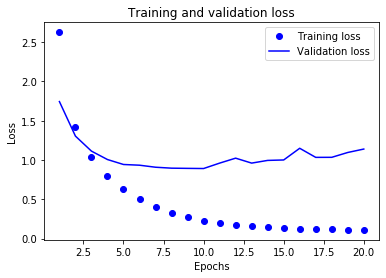

In [10]:
# Check accuracy of the model
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = "all"

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

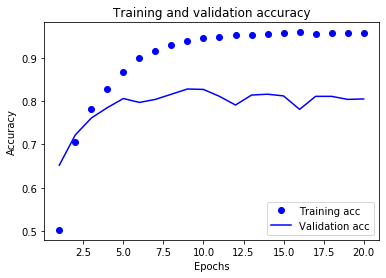

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Retrain for smaller amount of epochs to avoid overfitting
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 182us/step - loss: 2.6302 - accuracy: 0.5251 - val_loss: 1.7239 - val_accuracy: 0.6450
Epoch 2/9
7982/7982 [==============================] - 1s 145us/step - loss: 1.4114 - accuracy: 0.7015 - val_loss: 1.3250 - val_accuracy: 0.6930
Epoch 3/9
7982/7982 [==============================] - 1s 138us/step - loss: 1.0715 - accuracy: 0.7622 - val_loss: 1.1592 - val_accuracy: 0.7410
Epoch 4/9
7982/7982 [==============================] - 1s 140us/step - loss: 0.8460 - accuracy: 0.8162 - val_loss: 1.0606 - val_accuracy: 0.7680
Epoch 5/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.6775 - accuracy: 0.8553 - val_loss: 0.9922 - val_accuracy: 0.7910
Epoch 6/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.5417 - accuracy: 0.8852 - val_loss: 0.9322 - val_accuracy: 0.8110
Epoch 7/9
7982/7982 [==============================] - 1s 135us/step - loss: 0.435

In [13]:
model.evaluate(x_test, encoded_labels_test)

2246/2246 [==============================] - 0s 176us/step


[0.9725057993843846, 0.7831701040267944]

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

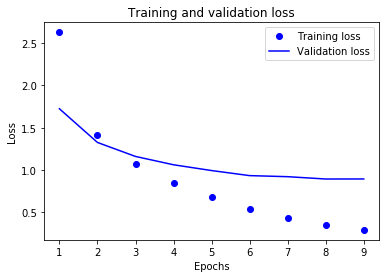

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

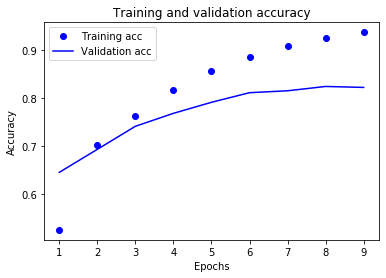

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Predict
predictions = model.predict(x_test)
np.argmax(predictions[10])

1

In [19]:
# Exchange hidden layer for layer of 4 neurons
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=14,
                   batch_size=128,
                   validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/14
7982/7982 [==============================] - 2s 219us/step - loss: 2.8828 - accuracy: 0.2217 - val_loss: 2.1533 - val_accuracy: 0.4240
Epoch 2/14
7982/7982 [==============================] - 1s 179us/step - loss: 1.7065 - accuracy: 0.6397 - val_loss: 1.4393 - val_accuracy: 0.6700
Epoch 3/14
7982/7982 [==============================] - 1s 182us/step - loss: 1.2611 - accuracy: 0.6984 - val_loss: 1.3067 - val_accuracy: 0.6790
Epoch 4/14
7982/7982 [==============================] - 2s 188us/step - loss: 1.0892 - accuracy: 0.7170 - val_loss: 1.2565 - val_accuracy: 0.6890
Epoch 5/14
7982/7982 [==============================] - 2s 196us/step - loss: 0.9702 - accuracy: 0.7606 - val_loss: 1.2477 - val_accuracy: 0.7090
Epoch 6/14
7982/7982 [==============================] - 1s 180us/step - loss: 0.8778 - accuracy: 0.7838 - val_loss: 1.2135 - val_accuracy: 0.7160
Epoch 7/14
7982/7982 [==============================] - 1s 181us/step - loss

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

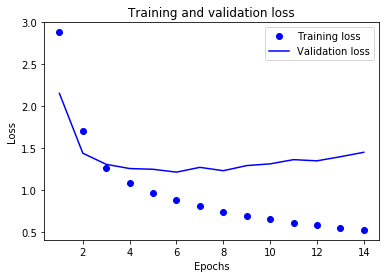

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

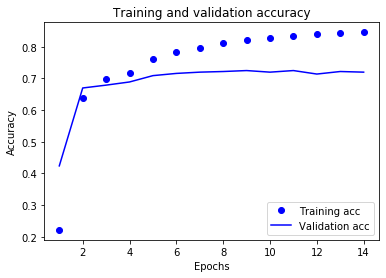

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

With 4 neurons in hidden layer, we achieve worse accuracy. It is probably due to the fact we are trying to compress a lot of data.